In [1]:
import pandas as pd
from rdkit import Chem

In [2]:
df = pd.read_csv('../file_import/150_smiles-strings_example.smi', names=['SMILES'])

In [3]:
def neutralize_atoms(mol):
    pattern = Chem.MolFromSmarts("[+1!h0!$([*]~[-1,-2,-3,-4]),-1!$([*]~[+1,+2,+3,+4])]")
    at_matches = mol.GetSubstructMatches(pattern)
    at_matches_list = [y[0] for y in at_matches]
    if len(at_matches_list) > 0:
        for at_idx in at_matches_list:
            atom = mol.GetAtomWithIdx(at_idx)
            chg = atom.GetFormalCharge()
            hcount = atom.GetTotalNumHs()
            atom.SetFormalCharge(0)
            atom.SetNumExplicitHs(hcount - chg)
            atom.UpdatePropertyCache()
    return mol

In [4]:
def clean_smiles(smiles):
    rdkit_mol = Chem.MolFromSmiles(smiles)
    rdkit_mol = neutralize_atoms(rdkit_mol)
    inchi = Chem.MolToInchi(rdkit_mol)
    rdkit_mol = Chem.MolFromInchi(inchi)
    cleaned_smiles = Chem.MolToSmiles(rdkit_mol)
    return cleaned_smiles

In [5]:
df['cleaned_SMILES'] = df['SMILES'].apply(clean_smiles)

In [7]:
df['smiles_length'] = df['SMILES'].apply(len)

In [9]:
df['cleaned_smiled_length'] = df['cleaned_SMILES'].apply(len)

In [10]:
df

,SMILES,cleaned_SMILES,smiles_length,cleaned_smiled_length
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,CC(C)(C)c1ccc2occ(CC(O)=Nc3ccccc3F)c2c1,39,39
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,44,44
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,53,53
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,56,56
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,N#CC1=C(SCC(O)=Nc2cccc(Cl)c2)N=C(O)[C@H](C#N)C...,57,54
...,...,...,...,...
145,Cc1cccc(NC(=O)CN2CCN(c3ccc4c(c3)OCCO4)C2=O)n1,Cc1cccc(N=C(O)CN2CCN(c3ccc4c(c3)OCCO4)C2=O)n1,45,45
146,C=C(C)C(=O)N[C@H](C)c1nc2ccccc2n1CCC(=O)N1CCCCCC1,C=C(C)C(O)=N[C@H](C)c1nc2ccccc2n1CCC(=O)N1CCCCCC1,49,49
147,CCOC[C@H]1CC[NH+](Cc2ccc(-c3nc4ccccc4s3)o2)C1,CCOC[C@H]1CCN(Cc2ccc(-c3nc4ccccc4s3)o2)C1,45,41
148,CCOC(=O)[C@]1(Cc2cccc(Cl)c2)CCCN(C(=O)c2ccnn2C)C1,CCOC(=O)[C@]1(Cc2cccc(Cl)c2)CCCN(C(=O)c2ccnn2C)C1,49,49


In [11]:
df.drop(['SMILES', 'smiles_length', 'cleaned_smiled_length'], 1, inplace=True)

In [12]:
df

,cleaned_SMILES
0,CC(C)(C)c1ccc2occ(CC(O)=Nc3ccccc3F)c2c1
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...
4,N#CC1=C(SCC(O)=Nc2cccc(Cl)c2)N=C(O)[C@H](C#N)C...
...,...
145,Cc1cccc(N=C(O)CN2CCN(c3ccc4c(c3)OCCO4)C2=O)n1
146,C=C(C)C(O)=N[C@H](C)c1nc2ccccc2n1CCC(=O)N1CCCCCC1
147,CCOC[C@H]1CCN(Cc2ccc(-c3nc4ccccc4s3)o2)C1
148,CCOC(=O)[C@]1(Cc2cccc(Cl)c2)CCCN(C(=O)c2ccnn2C)C1


In [13]:
df.to_csv('../file_import/cleaned_smiles.csv', index=False, header=False)

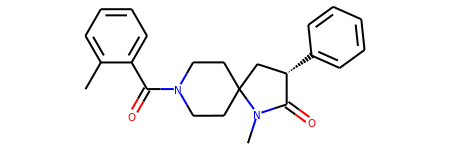

In [24]:
# stereo undefined:
mol = Chem.MolFromSmiles('Cc1ccccc1C(=O)N1CCC2(CC1)C[C@H](c1ccccc1)C(=O)N2C')
mol

mol

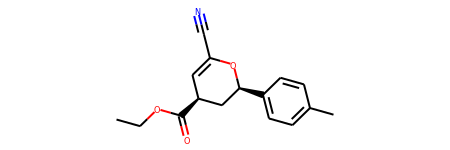

In [25]:
mol1 = Chem.MolFromSmiles('CCOC(=O)[C@H]1C=C(C#N)O[C@@H](c2ccc(C)cc2)C1')
mol1

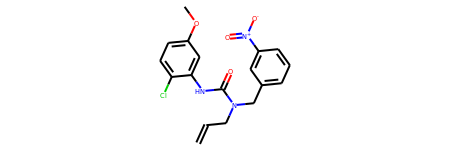

In [40]:
# charges rearranged:
mol2 = Chem.MolFromSmiles('C=CCN(Cc1cccc([N+](=O)[O-])c1)C(=O)Nc1cc(OC)ccc1Cl')
mol2

In [ ]:
# O=[N+]([O-])c1c(Nc2ccc(F)c(F)c2)ncnc1Oc1cccc2cccnc12
# Cc1c(C(=O)N2CCOCC2)oc2c1-c1nn(CC(O)=NCc3ccco3)cc1CC2
# C=CCN(Cc1cccc([N+](=O)[O-])c1)C(O)=Nc1cc(OC)ccc1Cl
# CCC[C@]1(C(O)=N[C@@H]2CON=C2O)CCNC1
# C=CCN(C(=O)C/C=C/c1ccc(C)cc1)[C@@H]1CCS(=O)(=O)C1
# C[C@H]1CCCN(c2ccc(C(=O)Nc3ccc(N4CCOCC4)cc3)cc2[N+](=O)[O-])C1
# CC(=O)c1ccc(S(=O)(=O)N2CCCC[C@H]2C)cc1